# Lending Club Case Study

### Objective

Credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. 

If these risky loan applicants can be identified, such loans can be reduced, lowering the amount of credit loss. The objective of this case study is to **identify such applicants using EDA (Exploratory Data Analysis).**


### Additional Information
When a person applies for a loan, there are two types of decisions that could be taken by the company:

* Loan accepted: If the company approves the loan, there are 3 possible scenarios described below:

    * Fully paid: Applicant has fully paid the loan (the principal and the interest rate)

    * Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

    * Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 



* Loan rejected: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

In [1]:
## import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the dataset, .csv in this case
loandf = pd.read_csv("loan.csv")

The procedure for analyzing a dataset is as follows:
1. Understand the data
2. Data cleaning
3. Exploratory Data Analysis
4. Conclusion

Let's look at the shape of the dataframe to get an idea of the rows and columns

In [3]:
#dataframe shape
loandf.shape

(39717, 111)

Now, Let's check the first few rows

In [4]:
loandf.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


### Data Cleaning

At first glance, it appears that there are many null values. Let's analyze it.

In [5]:
#check the dataframe for missing values and sort the columns in descending order
loandf.isnull().sum().sort_values(ascending=False)

verification_status_joint    39717
annual_inc_joint             39717
mo_sin_old_rev_tl_op         39717
mo_sin_old_il_acct           39717
bc_util                      39717
                             ...  
delinq_amnt                      0
policy_code                      0
earliest_cr_line                 0
delinq_2yrs                      0
id                               0
Length: 111, dtype: int64

We confirmed that there are a lot of columns with null values. Let's clear them

In [6]:
#drop all the columns with missing values
loandf.dropna(axis = 1, how = 'all', inplace = True)

Columns with identical(repetitive) values

In [7]:
#check the dataframe for columns with identical values
loandf.nunique(axis=0).sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
pymnt_plan                        1
initial_list_status               1
term                              2
next_pymnt_d                      2
pub_rec_bankruptcies              3
loan_status                       3
verification_status               3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
emp_length                       11
delinq_2yrs                      11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
mths_since_last_delinq           95
last_pymnt_d                

Remove all columns with only one unique value because they add little to our analysis

In [8]:
#The following columns have identical values, so drop them
identical_cols = ['pymnt_plan', "initial_list_status",'collections_12_mths_ex_med','policy_code','acc_now_delinq', 'application_type', 'chargeoff_within_12_mths', 'tax_liens', 'delinq_amnt']
loandf.drop(identical_cols, axis = 1, inplace = True)
loandf.shape

(39717, 48)

Now, we are left with 48 columms, let's see if these can be further reduced

In [9]:
#check for columns with high number of missing values
loandf.isna().sum()[loandf.isna().sum() > 0]

emp_title                  2459
emp_length                 1075
desc                      12940
title                        11
mths_since_last_delinq    25682
mths_since_last_record    36931
revol_util                   50
last_pymnt_d                 71
next_pymnt_d              38577
last_credit_pull_d            2
pub_rec_bankruptcies        697
dtype: int64

<AxesSubplot:>

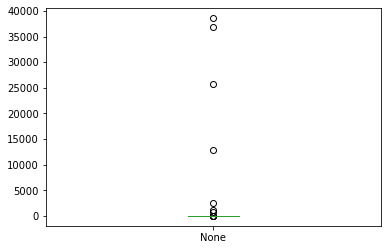

In [10]:
#check for outliers using a box plot
loandf.isna().sum().plot.box()

Based on the boxplot, it's observed that the columns with missing count 10000 or more clearly stand as outliers

In [11]:
#the following columns were identified as outliers using the box plot and columns with missing values, so drop them
cols_outliers = ['desc','mths_since_last_record','next_pymnt_d','mths_since_last_delinq']
loandf.drop(cols_outliers, axis=1,inplace=True)

Check the dataframe information to get an idea of the types of column

In [12]:
loandf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

Columns with high number of unique values also doesn't contribute much to the analysis.

In [13]:
#the following columns were identified as columns with all the values as unique values. So, drop them
unnecessary_identifier_cols = ["id","member_id","url", "zip_code"]
loandf.drop(unnecessary_identifier_cols, axis=1,inplace=True)

Based on the definitions of the columns in 'data dictionary.xlsx,' it can be seen that the following columns are irrelevant for the analysis to identify risky loan applications as these are mostly parameters that doesn't influence the loan approval decision. So, the following columns can be safely dropped.

In [14]:
#following columns can be dropped considering the assumption that they don't influence any approval decision
irrelev_cols = ['funded_amnt','funded_amnt_inv','delinq_2yrs','earliest_cr_line','last_pymnt_amnt','issue_d',
                'last_pymnt_d', 'last_credit_pull_d', 'open_acc' ,'out_prncp', 'out_prncp_inv','pub_rec', 'revol_bal',
                'revol_util', 'recoveries', 'sub_grade','total_pymnt','total_pymnt_inv','total_rec_int', 'inq_last_6mths',
                'collection_recovery_fee','total_acc','total_rec_late_fee','total_rec_prncp']

loandf.drop(irrelev_cols, axis=1, inplace=True)

Now, let's check if there are still some missing values in our columns

In [15]:
#check for missing values
print(((loandf.isnull().sum()/loandf.shape[0])*100).round(2))

loan_amnt               0.00
term                    0.00
int_rate                0.00
installment             0.00
grade                   0.00
emp_title               6.19
emp_length              2.71
home_ownership          0.00
annual_inc              0.00
verification_status     0.00
loan_status             0.00
purpose                 0.00
title                   0.03
addr_state              0.00
dti                     0.00
pub_rec_bankruptcies    1.75
dtype: float64


The columns 'emp_title', 'emp_length', 'title' and 'pub_rec_bankruptcies' have some missing data. Let's try to analyze

In [16]:
#values in emp_title column
loandf.emp_title.value_counts()

US Army                              134
Bank of America                      109
IBM                                   66
AT&T                                  59
Kaiser Permanente                     56
                                    ... 
Community College of Philadelphia      1
AMEC                                   1
lee county sheriff                     1
Bacon County Board of Education        1
Evergreen Center                       1
Name: emp_title, Length: 28820, dtype: int64

In [17]:
#values in emp_length
loandf.emp_length.value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [18]:
#values in title column
loandf.title.value_counts()

Debt Consolidation                  2184
Debt Consolidation Loan             1729
Personal Loan                        659
Consolidation                        517
debt consolidation                   505
                                    ... 
your rate is better than my rate       1
Concession Trailer                     1
gregs                                  1
EZover                                 1
JAL Loan                               1
Name: title, Length: 19615, dtype: int64

In [19]:
#values in pub_rec_bankruptcies column
loandf.pub_rec_bankruptcies.value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

The columns 'title' and 'emp_title' have a lot of unique data and is mostly personal demographics, so can be dropped.

In [20]:
#dropping the columns 'title' and 'emp_title'
irrelevant_cols=['title','emp_title']
loandf.drop(irrelevant_cols,axis=1,inplace=True)

For the column 'emp_length', the data looks evenly distributed now, so let's just delete the missing values

In [21]:
#delete missing values from emp_length column
loandf = loandf[~loandf.emp_length.isnull()]

For the column 'pub_rec_bankruptcies', performing data imputation

In [22]:
#filling the missing values with mode of the column
loandf.pub_rec_bankruptcies.fillna(loandf.pub_rec_bankruptcies.mode()[0],inplace=True)

In [23]:
#check the column types for dtypes and other info
loandf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38642 non-null  int64  
 1   term                  38642 non-null  object 
 2   int_rate              38642 non-null  object 
 3   installment           38642 non-null  float64
 4   grade                 38642 non-null  object 
 5   emp_length            38642 non-null  object 
 6   home_ownership        38642 non-null  object 
 7   annual_inc            38642 non-null  float64
 8   verification_status   38642 non-null  object 
 9   loan_status           38642 non-null  object 
 10  purpose               38642 non-null  object 
 11  addr_state            38642 non-null  object 
 12  dti                   38642 non-null  float64
 13  pub_rec_bankruptcies  38642 non-null  float64
dtypes: float64(4), int64(1), object(9)
memory usage: 4.4+ MB


It can be observed that the column 'int_rate' is with invalid data type. So, let's try to correct it

In [24]:
#correcting the data types
loandf.int_rate = loandf.int_rate.apply(lambda x:str(x).replace('%','')).astype('float').round(2) #interest rate

In [25]:
loandf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38642 non-null  int64  
 1   term                  38642 non-null  object 
 2   int_rate              38642 non-null  float64
 3   installment           38642 non-null  float64
 4   grade                 38642 non-null  object 
 5   emp_length            38642 non-null  object 
 6   home_ownership        38642 non-null  object 
 7   annual_inc            38642 non-null  float64
 8   verification_status   38642 non-null  object 
 9   loan_status           38642 non-null  object 
 10  purpose               38642 non-null  object 
 11  addr_state            38642 non-null  object 
 12  dti                   38642 non-null  float64
 13  pub_rec_bankruptcies  38642 non-null  float64
dtypes: float64(5), int64(1), object(8)
memory usage: 4.4+ MB


So, with the current columns, let's start our analysis

In [26]:
#print the columns used for analysis
print(loandf.columns)

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'purpose', 'addr_state', 'dti', 'pub_rec_bankruptcies'],
      dtype='object')


### Univariate Analysis

As it's hard to come up with analyis for the current ongoing loans, we just drop 'em

In [27]:
#Avoid the data relevant to current loans
loandf = loandf[loandf.loan_status!='Current']

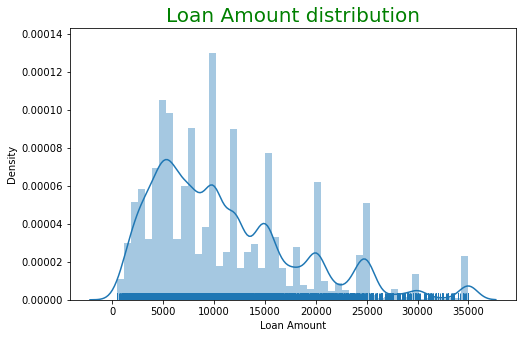

count    37544.000000
mean     11119.329986
std       7354.098954
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [28]:
plt.figure(figsize=(8,5))
ax = sns.distplot(loandf['loan_amnt'], rug=True)
ax.set_title('Loan Amount distribution',fontsize=20,color='g')
ax.set_xlabel('Loan Amount')
plt.show()

loandf.loan_amnt.describe()

Observation: 
- Most loan applications are for sums in the thousands, such as 5000, 10000, 15000, 20000 etc.
- Most borrowers are looking for loan below 15000
- Loan amount range from 500 to 35000
- The loan amount graph looks positively skewed

In [29]:
#Categorizing the loan amount such that it can be utilized better
loandf['loan_amnt_cat']=pd.cut(loandf.loan_amnt, np.arange(0,35000,5000),labels=['0-5k', '5k-10k', '10k-15k', '15k-20k', '20k-25k', '25k+'])

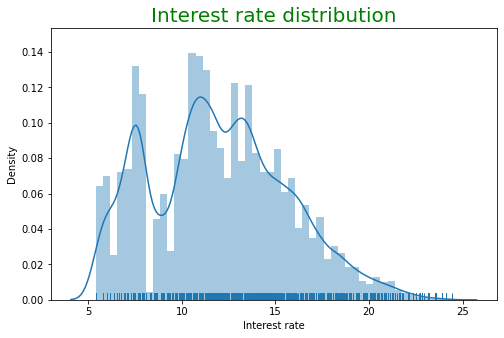

count    37544.000000
mean        11.963319
std          3.683012
min          5.420000
25%          8.940000
50%         11.830000
75%         14.420000
max         24.400000
Name: int_rate, dtype: float64

In [30]:
plt.figure(figsize=(8,5))
ax = sns.distplot(loandf['int_rate'], rug=True)
ax.set_title('Interest rate distribution',fontsize=20,color='g')
ax.set_xlabel('Interest rate')
plt.show()

loandf.int_rate.describe()

Observation: 
- Interest rate for most applications ranged from 8.9 to 14.27 percent.
- Interest rate ranges from 5.4 to 24.4

In [31]:
#categorizing the interest rate
loandf['int_rate_cat']=pd.cut(loandf.int_rate,np.arange(0,26,5),labels=['0-5', '5-10', '10-15', '15-20', '20+'])

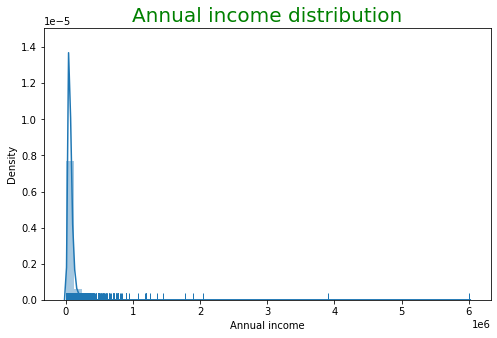

count    3.754400e+04
mean     6.940708e+04
std      6.467698e+04
min      4.000000e+03
25%      4.100000e+04
50%      6.000000e+04
75%      8.300000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [32]:
plt.figure(figsize=(8,5))
ax = sns.distplot(loandf['annual_inc'], rug=True)
ax.set_title('Annual income distribution',fontsize=20,color='g')
ax.set_xlabel('Annual income')
plt.show()

loandf.annual_inc.describe()

The median is far below to 0.6M and the 75th percentile is around 0.83M whereas the maximum is close to 6M.
Look's like there are outliers here which are to be removed to give a better idea

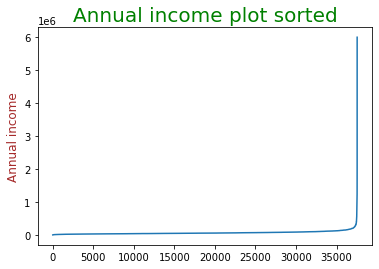

In [33]:
#finding an appropriate quantile to make a cutoff
sorted_loan_amnt = sorted(loandf.annual_inc)
plt.plot(sorted_loan_amnt)
plt.title('Annual income plot sorted',fontsize=20,color='g')
plt.ylabel('Annual income', fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()


Based on the above graph, it can be seen that the above outliers lie above the 90th percentile. So, let's just make 90 a cutoff for this

In [34]:
#Only consider the data until 90th percentile
loandf = loandf[loandf.annual_inc<=np.percentile(loandf.annual_inc,90)]

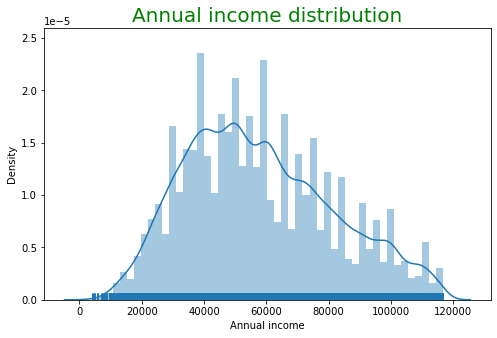

count     33789.000000
mean      57795.435199
std       23616.482851
min        4000.000000
25%       40000.000000
50%       55000.000000
75%       74800.000000
max      116664.000000
Name: annual_inc, dtype: float64

In [35]:
#Check the annual income distribution after dropping the top 10 percentile
plt.figure(figsize=(8,5))
ax = sns.distplot(loandf['annual_inc'], rug=True)
ax.set_title('Annual income distribution',fontsize=20,color='g')
ax.set_xlabel('Annual income')
plt.show()

loandf.annual_inc.describe()

Observation: 
- Annual income for most of the applicants ranges from 40000 to 75000, while the min and max income are 4000 and 116664 respectively

In [36]:
#categorizing the annual income
loandf['income_cat']=pd.cut(loandf.annual_inc, np.arange(0,120001,20000),labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000-100000', '100000+'])

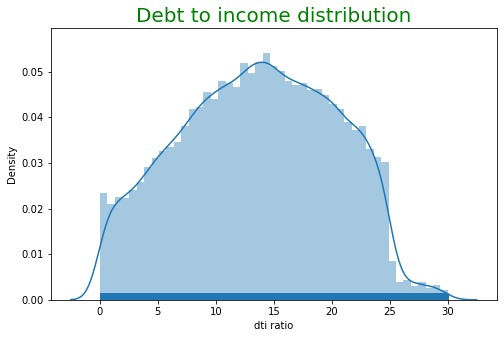

count    33789.000000
mean        13.557637
std          6.660927
min          0.000000
25%          8.480000
50%         13.730000
75%         18.830000
max         29.990000
Name: dti, dtype: float64

In [37]:
plt.figure(figsize=(8,5))
ax = sns.distplot(loandf['dti'],rug=True)
ax.set_title('Debt to income distribution',fontsize=20,color='g')
ax.set_xlabel('dti ratio')
plt.show()

loandf.dti.describe()

Observation: 
- Dti for most borrowers range from 8.48 to 18.83

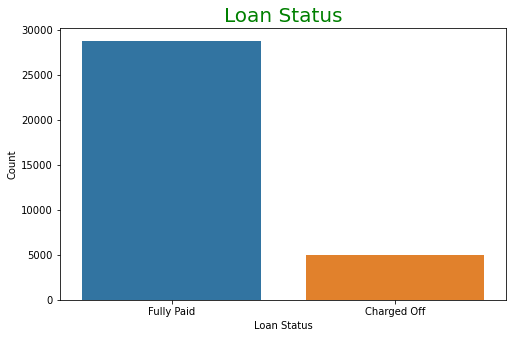

Fully Paid     28810
Charged Off     4979
Name: loan_status, dtype: int64

In [38]:
plt.figure(figsize=(8,5))
ax=sns.countplot(loandf.loan_status)
ax.set_title('Loan Status',color='g',fontsize=20)
ax.set_xlabel('Loan Status')
ax.set_ylabel('Count')
plt.show()

loandf.loan_status.value_counts()

Observation
- Most loans are fully paid when compared to Charged off

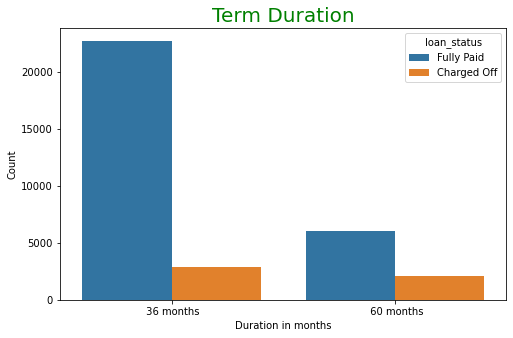

 36 months    25608
 60 months     8181
Name: term, dtype: int64

In [39]:
plt.figure(figsize=(8,5))
ax=sns.countplot('term',data=loandf, hue='loan_status')
ax.set_title('Term Duration',color='g',fontsize=20)
ax.set_xlabel('Duration in months')
ax.set_ylabel('Count')
plt.show()

loandf.term.value_counts()

Observation
- Most loans are applied for 36 months when compared to 60 months
- Loans in 60 months have higher probability of getting charged off when compared to 36 months

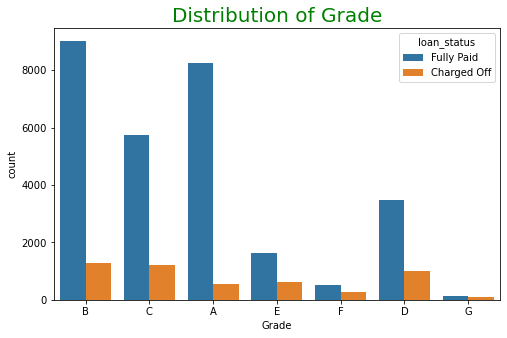

B    10290
A     8799
C     6977
D     4473
E     2227
F      795
G      228
Name: grade, dtype: int64

In [40]:
plt.figure(figsize=(8,5))
ax=sns.countplot('grade', data=loandf, hue='loan_status')
ax.set_xlabel('Grade')
ax.set_title('Distribution of Grade',color='g',fontsize=20)
plt.show()

loandf.grade.value_counts()

Observation
- Most loans are of type Grade A, B
- The grade E, F, G are considered low as they have higher chance of getting charged off

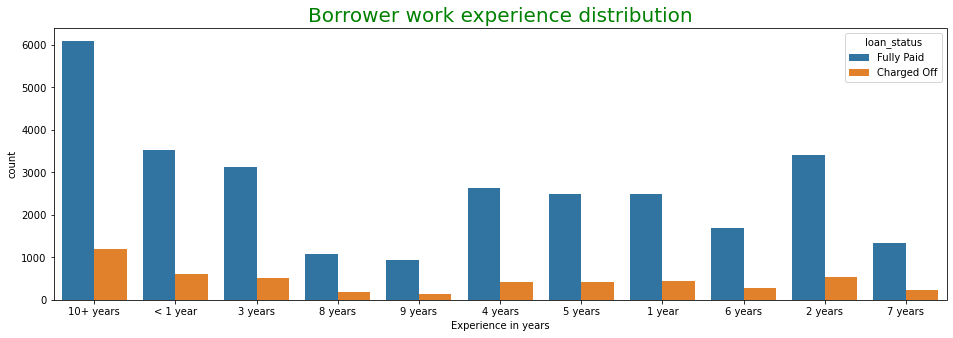

10+ years    7295
< 1 year     4129
2 years      3942
3 years      3636
4 years      3056
1 year       2923
5 years      2913
6 years      1978
7 years      1568
8 years      1263
9 years      1086
Name: emp_length, dtype: int64

In [41]:
# check employement experience
plt.figure(figsize=(16,5))
ax =sns.countplot(loandf.emp_length, hue=loandf.loan_status)
ax.set_xlabel('Experience in years')
ax.set_title('Borrower work experience distribution',color='g',fontsize=20)
plt.show()

loandf.emp_length.value_counts()

Observation
- The borrowers with 10 and more years of experience have applied for the most loans

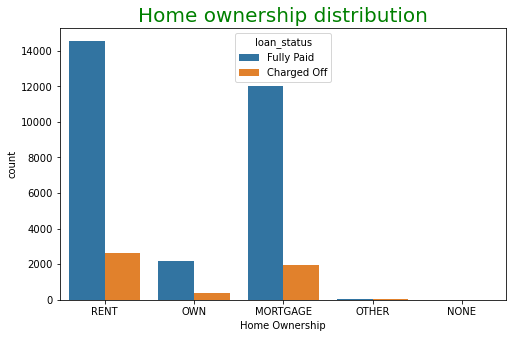

In [42]:
# Home ownership
plt.figure(figsize=(8,5))
ax=sns.countplot(loandf.home_ownership, hue=loandf.loan_status)
ax.set_xlabel('Home Ownership')
ax.set_title('Home ownership distribution',color='g',fontsize=20)
plt.show()

Observation
- The borrowers living in a rented space or having mortgages have applied for the most loans

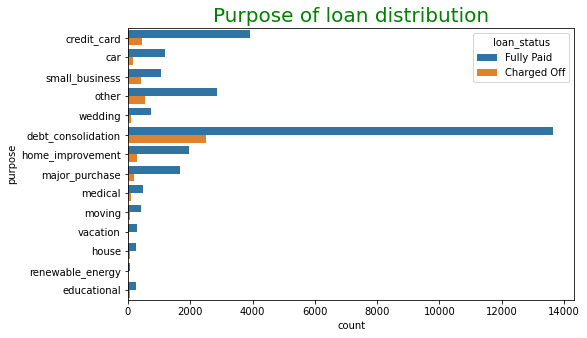

debt_consolidation    16145
credit_card            4386
other                  3399
home_improvement       2233
major_purchase         1883
small_business         1477
car                    1342
wedding                 832
medical                 587
moving                  495
vacation                325
house                   306
educational             298
renewable_energy         81
Name: purpose, dtype: int64

In [43]:
# purpose
plt.figure(figsize=(8,5))
sns.countplot(y=loandf.purpose, hue=loandf.loan_status)
plt.title('Purpose of loan distribution',color='g',fontsize=20)
plt.show()

loandf.purpose.value_counts()

Observation
- Debt consolidation and credit card payments are the most mentioned purpose for loan application by borrowers
- Debt consolidation also have higher chances of getting the loan charged off

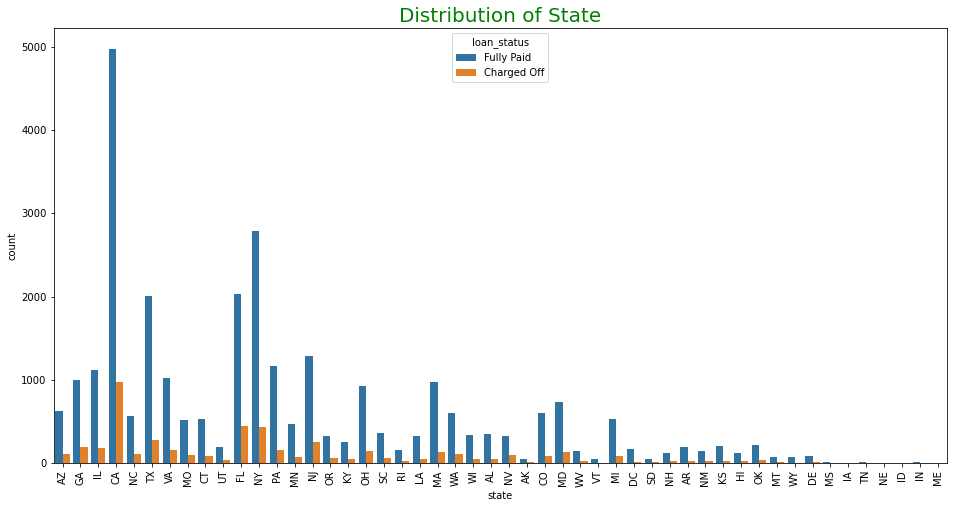

In [44]:
# state distribution
plt.figure(figsize=(16,8))
ax=sns.countplot(loandf.addr_state,hue=loandf.loan_status)
ax.set_xlabel('state')
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_title('Distribution of State',color='g',fontsize=20)
plt.show()


Observation
- Most borrowers belong to states CA, NY, FL, NJ and TX
- Borrowers from CA and NY have higher chances of getting the loan charged off

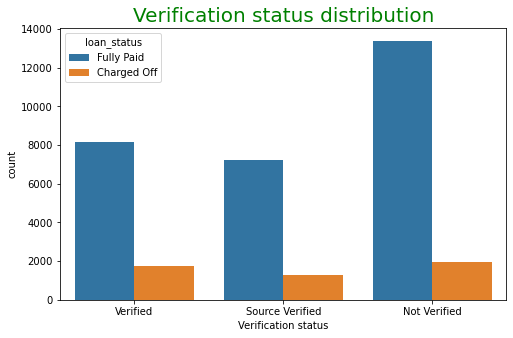

In [45]:
# Verification status
plt.figure(figsize=(8,5))
ax=sns.countplot(loandf.verification_status, hue=loandf.loan_status)
ax.set_xlabel('Verification status')
ax.set_title('Verification status distribution',color='g',fontsize=20)
plt.show()

Observation
- Income of the borrowers for the most loan application was verified.

### Bivariate Analysis

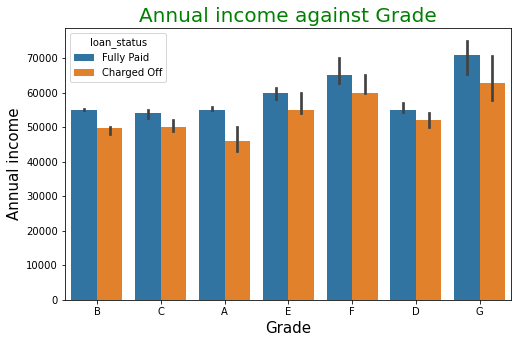

In [46]:
plt.figure(figsize=(8,5))

ax=sns.barplot(x=loandf.grade,y=loandf.annual_inc,hue=loandf.loan_status,estimator=np.median)
ax.set_title('Annual income against Grade',fontsize=20,color='g')
ax.set_ylabel('Annual income',fontsize=15)
ax.set_xlabel('Grade',fontsize=15)

plt.show()

Observation
- In the same grade, if the income is lesser, the chances of defaulting is higher

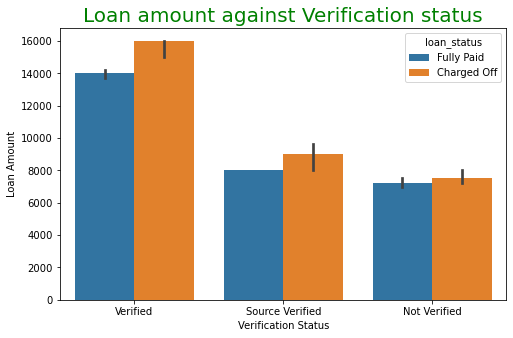

In [47]:
plt.figure(figsize=(8,5))

ax=sns.barplot(y=loandf.loan_amnt,x=loandf.verification_status,hue=loandf.loan_status,estimator=np.median)
ax.set_title('Loan amount against Verification status',fontsize=20,color='g')
ax.set_ylabel('Loan Amount')
ax.set_xlabel('Verification Status')

plt.show()

Observation
- Verified applicants tends to go for higher loan amount, thereby increasing the charge off chances

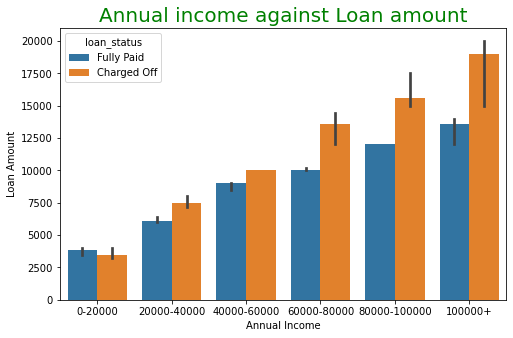

In [48]:
plt.figure(figsize=(8,5))

ax=sns.barplot(y=loandf.loan_amnt, x=loandf.income_cat,hue=loandf.loan_status,estimator=np.median)
ax.set_title('Annual income against Loan amount',fontsize=20,color='g')
ax.set_xlabel('Annual Income')
ax.set_ylabel('Loan Amount')

plt.show()

Observation
- Interestingly, the chances of getting a loan charged off is higher with a higher income

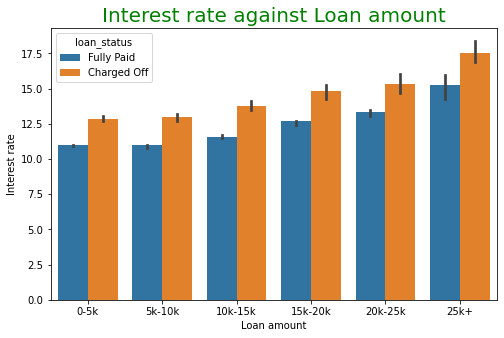

In [49]:
plt.figure(figsize=(8,5))

ax=sns.barplot(y=loandf.int_rate, x=loandf.loan_amnt_cat,hue=loandf.loan_status,estimator=np.median)
ax.set_title('Interest rate against Loan amount',fontsize=20,color='g')
ax.set_xlabel('Loan amount')
ax.set_ylabel('Interest rate')

plt.show()

Observation
- The interest rate tends to increase with the increasing loan amount

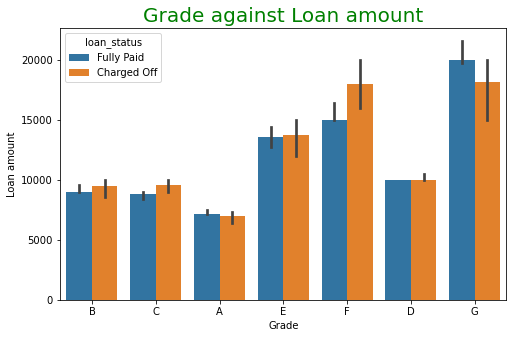

In [50]:
plt.figure(figsize=(8,5))

ax=sns.barplot(y=loandf.loan_amnt, x=loandf.grade, hue=loandf.loan_status,estimator=np.median)
ax.set_title('Grade against Loan amount',fontsize=20,color='g')
ax.set_ylabel('Loan amount')
ax.set_xlabel('Grade')

plt.show()


Observation
- As the loan amount increase, chances of classifying it into a lower grade increase

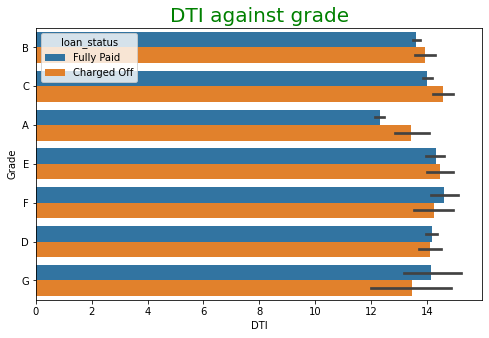

In [51]:
plt.figure(figsize=(8,5))
ax=sns.barplot(x=loandf.dti,y=loandf.grade,hue=loandf.loan_status)
ax.set_xlabel('DTI')
ax.set_ylabel('Grade')
ax.set_title('DTI against grade',fontsize=20,color='g')
plt.show()

Observation
- A lower grade has a lower dti ratio

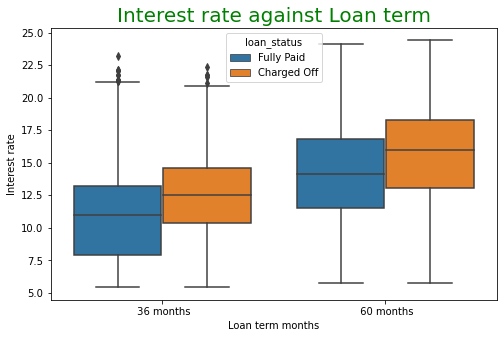

In [52]:
plt.figure(figsize=(8,5))
ax=sns.boxplot(y=loandf.int_rate,x=loandf.term,hue=loandf.loan_status)
ax.set_title('Interest rate against Loan term',fontsize=20,color='g')
ax.set_xlabel('Loan term months')
ax.set_ylabel('Interest rate')
plt.show()

Observation
- Higher interest rate along with higher loan tenure has higher chances of getting charged off

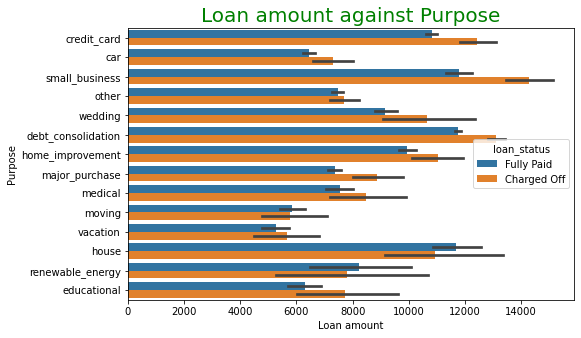

In [53]:
plt.figure(figsize=(8,5))
ax=sns.barplot(x=loandf.loan_amnt,y=loandf.purpose,hue=loandf.loan_status)
ax.set_xlabel('Loan amount')
ax.set_ylabel('Purpose')
ax.set_title('Loan amount against Purpose',fontsize=20,color='g')
plt.show()

Observation
- Loans for the purpose of small business, credit_card and debt_consolidation have higher chances of getting charged off
- Interestingly loans for the purpose of house or renewable energy have lower chances

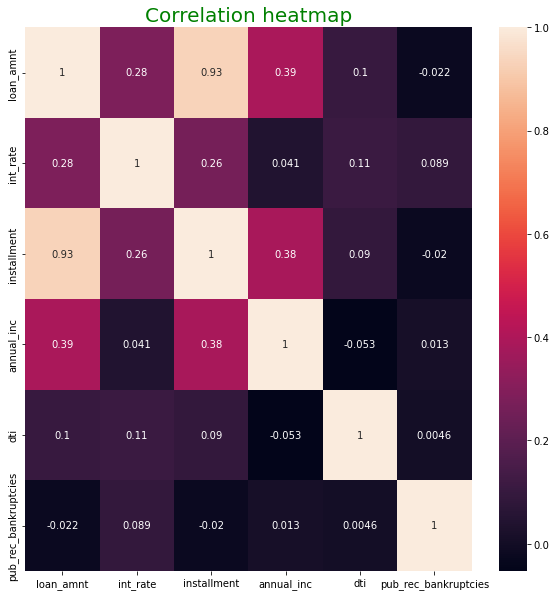

In [54]:
## Creating correlation graph
corr_graph = loandf.corr()

plt.figure(figsize=[10,10])
ax=sns.heatmap(corr_graph,fmt='.2g',annot=True)
ax.set_title('Correlation heatmap',color='g',fontsize=20)
plt.show()


### Conclusion

Based on our analysis so far using EDA, the following is inferred

The chances of getting a loan 'Charged Off' or 'default' increases with

- having a higher loan amount
- having a higher interest rate
- having loan grades in E,F or G
- borrower belonging to states like CA, NY and TX
- having a higher installment tenure
- having a purpose of 'small business' or 'credit card' payment
